In [1]:
import cv2
import numpy as np

In [23]:
img_path = 'D:/College/Sem VI/CV/sudoku.jpeg'
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)
cv2.waitKey(0)

13

In [24]:
# blur = cv2.medianBlur(gray, 5)

# adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
# thresh_type = cv2.THRESH_BINARY_INV

edges = cv2.Canny(gray,50,150)
cv2.imshow("Canny",edges)
cv2.waitKey(0)
# assume all pixels of same shape have same slope
# uses cordinates as row, theta
# dont need to know :)
# know about hough lines

# only need these two for straight lines
minLineLength = 10 # only detect lines at least 10 pixels long
maxLineGap = 50 # if lines more than 10 pixels apart, wont be joined together

# 1,np.pi/180,30 these params dont change for straight line
# Chnage for circles/curves etc. 
lines = cv2.HoughLinesP(edges,1,np.pi/180,30,minLineLength,maxLineGap)
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
cv2.imshow("Image",image)
cv2.waitKey(0)

-1

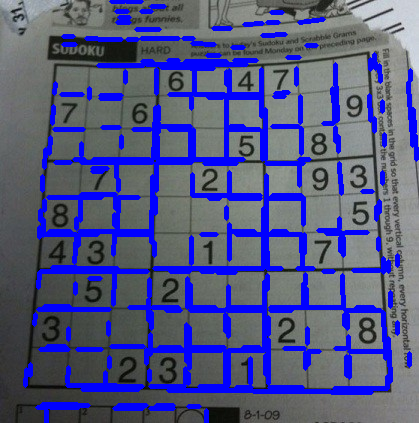

In [73]:
img_path1 = 'D:/College/Sem VI/CV/lanes1.jfif'
image1 = cv2.imread(img_path1)

# cv2.imshow("Image",image1)
# cv2.waitKey(0)

-1

In [63]:
# Convert the image to gray-scale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Gray",gray)
# cv2.waitKey(0)

blur = cv2.GaussianBlur(gray, (7, 7), 0)
# Find the edges in the image using canny detector
edges = cv2.Canny(blur, 75, 150)
# Show result
cv2.imshow("Canny",edges)
cv2.waitKey(0)

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, minLineLength=100, maxLineGap=100)
# Draw lines on the image
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(image1, (x1, y1), (x2, y2), (255, 0, 0), 1)
# Show result
cv2.imshow("Image",image1)
cv2.waitKey(0)


-1

In [72]:
img_path = 'D:/College/Sem VI/CV/lane5.jpg'
image = cv2.imread(img_path)
# cv2.imshow("Image",image)
# cv2.waitKey(0)

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
lower = np.array([0,190,0]) # keep everything in this range, rest blackened
upper = np.array([255,255,255])
yellowlower = np.array([50,75,65]) # keep everything in this range, rest blackened
yellowupper = np.array([125,255,168])

# https://www.tydac.ch/color/
# helps calculate ranges for colors

# remove whatever isnt white coz lanes are white and we dont care about the rest
# hue(shade), lightness and saturation
whitemask = cv2.inRange(hls, lower, upper)
yellowmask = cv2.inRange(hls, yellowlower, yellowupper)
mask = cv2.bitwise_or(yellowmask, whitemask)  # yellow coz yellow lanes also i guess
masked = cv2.bitwise_and(image, image, mask = mask) 

cv2.imshow("Image",masked)
cv2.waitKey(0)

-1

In [73]:
def roi(img):
    x = int(img.shape[1])
    y = int(img.shape[0])
    shape = np.array([[int(0), int(y)], [int(x), int(y)], [int(0.55*x), int(0.6*y)], [int(0.45*x), int(0.6*y)]])
#     cordinates of polygon in the middle in which lane would be

    #define a numpy array with the dimensions of img, but comprised of zeros
    mask = np.zeros_like(img)

    #Uses 3 channels or 1 channel for color depending on input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #creates a polygon with the mask color
    cv2.fillPoly(mask, np.int32([shape]), ignore_mask_color)

    #returns the image only where the mask pixels are not zero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

roi_img = roi(masked)

cv2.imshow("Image",roi_img)
cv2.waitKey(0)

-1

In [74]:
# def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
#     """
#     `img` should be the output of a Canny transform.
#     """
#     lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
#     line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
#     draw_lines(line_img, lines)
#     return line_img

# def linedetect(img):
#     return hough_lines(img, 1, np.pi/180, 10, 20, 100)


edges = cv2.Canny(cv2.cvtColor(roi_img, cv2.COLOR_RGB2GRAY), 50, 120)
# cv2.imshow("Canny",edges)
# cv2.waitKey(0)


lines = cv2.HoughLinesP(edges,1,np.pi/180,30, 100, 1)
# img2=image.copy()
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
cv2.imshow("Image",image)
cv2.waitKey(0)

-1